<h1><u>EDA and training on credit data set </u></h1>
<h3>April 2018</h3>



I'm using at a Credit data set to train models to predict people who will have a balances greater than  $1500
- Logistic regressio
- Linear discriminant analysis
- Quadratic discriminant analysis


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
X_cols = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']
df = pd.read_csv('../data/Credit.csv', usecols = X_cols) 
X = df.drop('Balance', axis = 1).values
X_cols.remove('Balance') # the perdicted variable
# transforming 'Balance' to a binary output, which equals 1 if 'Balance > 1500' and equals 0 otherwise.
y = np.array(df['Balance'] > 1500).astype(int)  
df.describe()
df.fillna(df.median(), inplace = True)

# Standardizing the data: mean = 0 and std = 1
scaler = preprocessing.StandardScaler().fit(X)   
X.mean(axis = 0)
X = scaler.transform(X)
print(X_cols)
pd.DataFrame(X, columns = X_cols).describe()

['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']


,Income,Limit,Rating,Cards,Age,Education
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,1.798561e-16,-1.598721e-16,1.554312e-17,-1.276756e-17,1.776357e-16,2.087219e-16
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-9.904743e-01,-1.683330e+00,-1.695069e+00,-1.429291e+00,-1.896161e+00,-2.707207e+00
25%,-6.878268e-01,-7.146973e-01,-6.968846e-01,-6.991298e-01,-8.078311e-01,-7.849299e-01
50%,-3.438443e-01,-4.906061e-02,-7.079503e-02,3.103187e-02,1.929972e-02,1.762088e-01
75%,3.480625e-01,4.932738e-01,5.326453e-01,7.611935e-01,8.319194e-01,8.169679e-01
max,4.017453e+00,3.980980e+00,4.057837e+00,4.412002e+00,2.457159e+00,2.098486e+00


In [4]:
pd.DataFrame(np.insert(X,6, y.astype(int), axis=1)).head()

,0,1,2,3,4,5,6
0,-0.861583,-0.489999,-0.465539,-0.699130,-1.257674,-0.784930,0.0
1,1.727437,0.828261,0.828703,0.031032,1.528451,0.496588,0.0
2,1.686756,1.014787,1.029311,0.761194,0.889964,-0.784930,0.0
3,2.946152,2.068440,2.110003,0.031032,-1.141586,-0.784930,0.0
4,0.302928,0.070012,0.013331,-0.699130,0.715831,0.816968,0.0


### Observations:
- As shown below, only 2.25 %  of data has balance > 1,500
- I must watch against null accuracy: accuracy that could be achieved by always predicting the most frequent class

In [5]:
print("{}% of the data has balance > 1,500 (true)".format(sum(y)*100/len(y) ))
print("Predicting False all the time would return an accuracy of 97.75%")
print("{} true and {} false ".format(sum(y), len(y)-sum(y)))

2.25% of the data has balance > 1,500 (true)
Predicting False all the time would return an accuracy of 97.75%
9 true and 391 false 


In [6]:
# This function describes the performance of classification models
def classification_performance(y, y_pred, y_prob):
    confusion = metrics.confusion_matrix(y, y_pred)
    TN = confusion[0, 0]
    FN = confusion[1, 0]
    FP = confusion[0, 1]
    TP = confusion[1, 1]
    print("Accuracy = \t\t{:1.4f}".format((TP + TN) / float(TP + TN + FP + FN)))
    print("Precision = \t\t{:1.4f}".format(TP / float(TP + FP)))
    print("Sensitivity (recall) = \t{:1.4f}".format(TP / float(TP + FN)))
    print("Specificity = \t\t{:1.4f}".format(TN / float(TN + FP)))
    print("F1-score bin = \t\t{:1.4f}".format(metrics.f1_score(y, y_pred, average='binary')))
    print("AUC score = \t\t{:1.4f}".format(metrics.roc_auc_score(y, y_prob)))
    print("\n")
    fpr, tpr, thresholds = metrics.roc_curve(y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curve for diabetes classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    return pd.DataFrame(confusion, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Training the following algorithms:
- Logistic regression
- Linear discriminant
- Quadratic discriminant 

Note: I am aware that I should check for overfitting (e.g., with cross-val), but I won't here


------------------ LR -------------------
* We note that LR predicted 4 true out of 9 *
Accuracy = 		0.9875
Precision = 		1.0000
Sensitivity (recall) = 	0.4444
Specificity = 		1.0000
F1-score bin = 		0.6154
AUC score = 		0.9722


          Predicted 0  Predicted 1
Actual 0          391            0
Actual 1            5            4

------------------ LD -------------------
* We note that LD predicted 5 true out of 9 *
Accuracy = 		0.9700
Precision = 		0.3846
Sensitivity (recall) = 	0.5556
Specificity = 		0.9795
F1-score bin = 		0.4545
AUC score = 		0.9517


          Predicted 0  Predicted 1
Actual 0          383            8
Actual 1            4            5

------------------ QD -------------------
* We note that qd predicted 7 true out of 9, which is the best performance, but overfits *
Accuracy = 		0.9925
Precision = 		0.8750
Sensitivity (recall) = 	0.7778
Specificity = 		0.9974
F1-score bin = 		0.8235
AUC score = 		0.9949


          Predicted 0  Predicted 1
Actual 0         

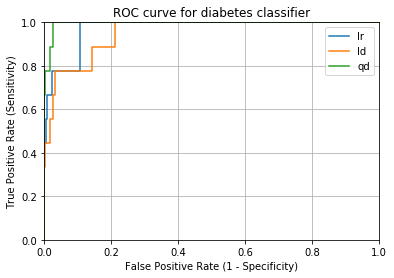

In [7]:
lr = LogisticRegression()
ld = LinearDiscriminantAnalysis()
qd = QuadraticDiscriminantAnalysis()

classifs = ['lr', 'ld', 'qd']
print("\n------------------ LR -------------------")
print("* We note that LR predicted 4 true out of 9 *")
print(classification_performance(y, lr.fit(X,y).predict(X), lr.predict_proba(X)[:,1]))

print("\n------------------ LD -------------------")
print("* We note that LD predicted 5 true out of 9 *")
print(classification_performance(y, ld.fit(X,y).predict(X), ld.predict_proba(X)[:,1]))

print("\n------------------ QD -------------------")
print("* We note that qd predicted 7 true out of 9, which is the best performance, but overfits *")
print(classification_performance(y, qd.fit(X,y).predict(X),  qd.predict_proba(X)[:,1]))
plt.legend(classifs);

# Finding the probability of getting a balance value greater than 1500) for x1 and x2 below, using these three methods. 

x1= 'Income' = 63, 'Limit' = 8100, 'Rating' = 600, 'Cards' = 4, 'Age' = 30, 'Education' =14 

x2= 'Income' = 186, 'Limit' = 13414, 'Rating' = 950, 'Cards' = 2, 'Age' = 41, 'Education' =13 

###  Observations:
- I performed EDA, cross validation and feature selection in the Appendix, which can be found at the end of this file. Here, I reuse the three models built on the entire data set. 



<ul> 
<li>The probabilities that x1 has Balance > 1500:</li>
<ul>
  <li>Logistic Reg = 14.6198%</li>
  <li>Linear Discr =  5.8554%</li>
  <li>Quad Discr   =  0%</li>
  </ul>
</ul>  

<ul> 
<li>The probabilities that x2 has Balance > 1500:</li>
<ul>
  <li>Logistic Reg = 66.5939%</li>
  <li>Linear Discr = 99.2788%</li>
  <li>Quad Discr   = 99.9217</li>
  </ul>
</ul>  

<ul>
<li>The three classifiers guessed right, assuming a threshold at 0.05</li>
<li>Quadratic discriminant analysis outperforms the two other algorithms (as shown earlier above), but overfits</li>
<li>With feature selection using Lasso and Ridge + gridsearch to find the best alphas), I noticed a performance increased in terms or recall and decrease in terms of rss (rss got bigger)</li>
<li>From cross-validation and feature selection results, I would drop Limit and would use linear discriminant analysis on unseen data </li>
<li>Because of null accuracy errors I'd need to handle this problem. There are several resampling methods to deal with imbalance. I did not resample in here</li>
</ul>

In [8]:
#x1= 'Income' = 63, 'Limit' = 8100, 'Rating' = 600, 'Cards' = 4, 'Age' = 30, 'Education' =14
#x2= 'Income' = 186, 'Limit' = 13414, 'Rating' = 950, 'Cards' = 2, 'Age' = 41, 'Education' =13

x1 = scaler.transform(np.array([63, 8100, 600, 4, 30, 14]).reshape(1,-1))
x2 = scaler.transform(np.array([186, 13414, 950, 2, 41, 13]).reshape(1,-1))

for i in  [lr, ld, qd]:
    print(i)
    print('x1: p(balance > 1500) = ', np.round(i.predict_proba(x1)[0][1]*100,4))
    print('x2: p(balance > 1500) = ', np.round(i.predict_proba(x2)[0][1]*100,4),'\n')
    
print("Similar data points in X\n------------------------")
print('x1 - Balance <  1500:\n', df[df.index == 10])
print('\n')
print('x2 - Balance >= 1500:\n ', df[df.index == 28])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
x1: p(balance > 1500) =  14.6198
x2: p(balance > 1500) =  66.5939 

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
x1: p(balance > 1500) =  5.8554
x2: p(balance > 1500) =  99.2788 

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)
x1: p(balance > 1500) =  0.0
x2: p(balance > 1500) =  99.9217 

Similar data points in X
------------------------
x1 - Balance <  1500:
     Income  Limit  Rating  Cards  Age  Education  Balance
10  63.095   8117     589      4   30         14     1407


x2 - Balance >= 1500:
       Income  Limit  Rating  Cards  Age  Education 

# Appendix: EDA, Features selection and Kfold CV

- As shown in the correlation matrix and plot below, the covariance between Limit and Rating is high, which could degrade the performance of our classifiers. Feature selection: I ran Lasso and Ridge reg and results suggest dropping Limit

- Income, Limit and Rating are the three best predictors. Only these have a significant correlation with Balance. Let's note that Cards' correlation with Balance is marginal, with a p-value of 0.08. See JointPlots below.

- I checked for outliers using IQR and did not find any outliers. So I left the traning data unaltered.

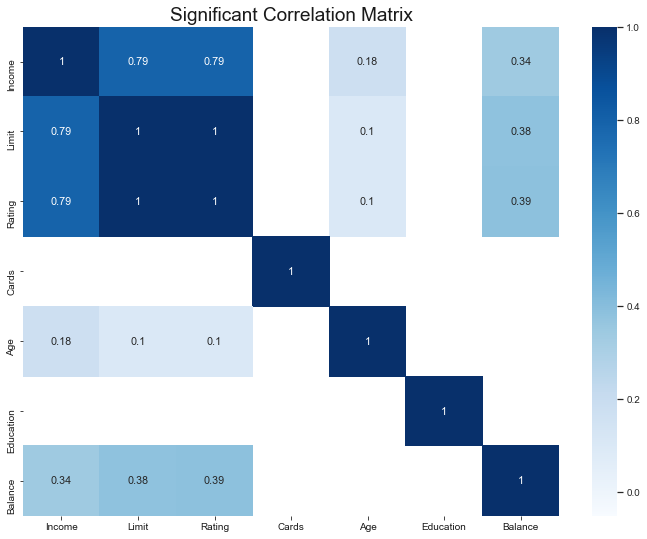

In [20]:
# computing pearson's correlation matrix -- showing only the stats significant cells
from scipy.stats.stats import pearsonr
from itertools import product

X_y = np.insert(X,6, y.astype(int), axis=1)
products = list(product(range(X_y.shape[1]), repeat = 2))
np.zeros([X_y.shape[1], X_y.shape[1]],dtype=float)
r = np.zeros([X_y.shape[1], X_y.shape[1]],dtype=float)
sig = np.zeros([X_y.shape[1], X_y.shape[1]],dtype=float)

for i in products:
    r[i] =  pearsonr(X_y[:,i[0]], X_y[:,i[1]])[0]
    sig[i] = pearsonr(X_y[:,i[0]], X_y[:,i[1]])[1]

mask = np.ones([X_y.shape[1], X_y.shape[1]], dtype = bool)  


for i in products:
    if sig[i] <= 0.05:
        mask[i] = False
        
if len(X_cols) < 7:
    X_cols = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']       

r.shape
X_cols
r = pd.DataFrame(r, columns = X_cols, index = X_cols)

plt.show()
plt.subplots(figsize=(12, 9));
sns.set(font_scale=0.9);
sns.heatmap(r, annot=True, mask = mask, cmap='Blues')
plt.title('Significant Correlation Matrix', fontsize = 19);



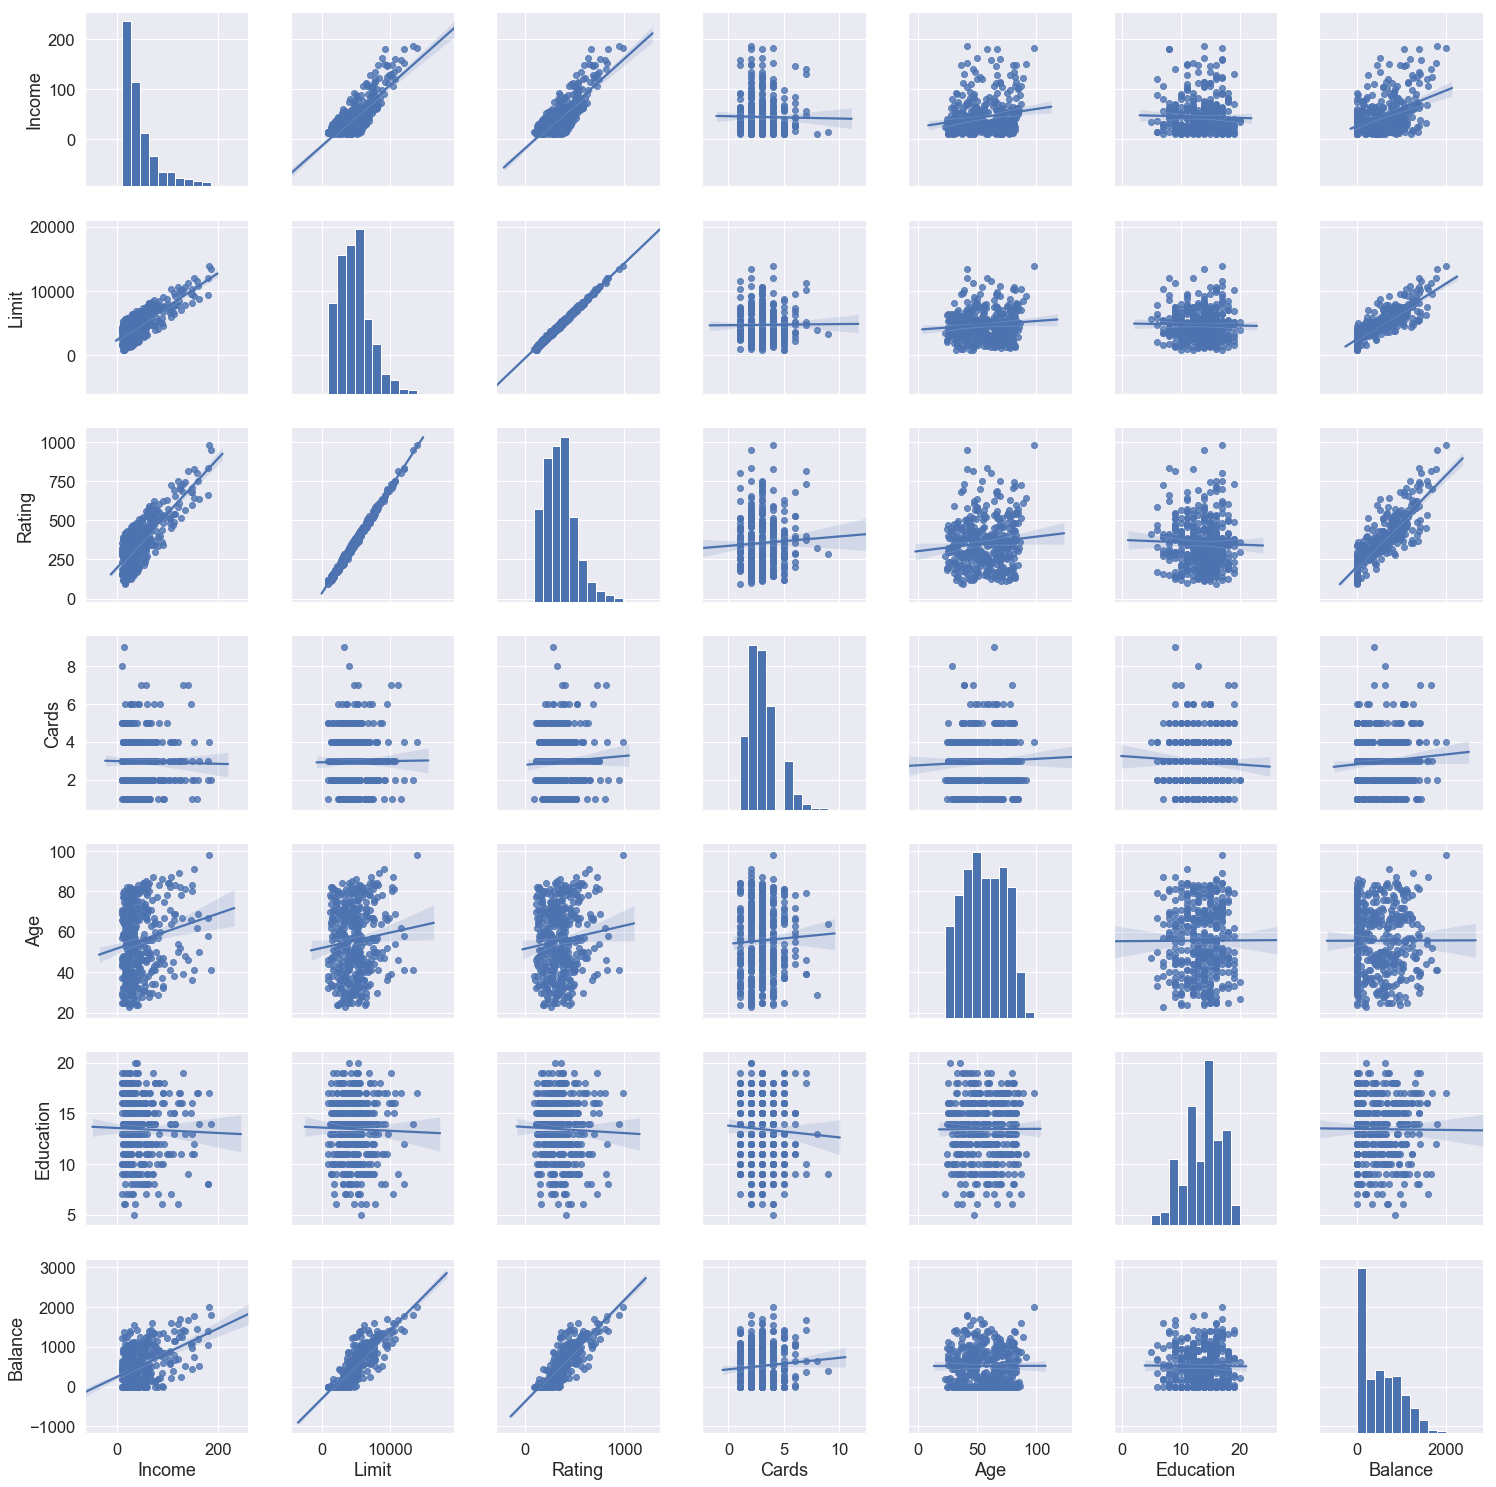

In [23]:
sns.set(font_scale=1.5)
sns.pairplot(df, kind='reg', size = 3);

In [21]:

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso #L1
from sklearn.linear_model import Ridge #L2
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

alpha = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10, 20, 30, 40, 50]

# figuring out the best alpha value
r_gs_cv = GridSearchCV(estimator = Ridge(), param_grid = dict(alpha=alpha), n_jobs = -1, cv = 10)  
l_gs_cv = GridSearchCV(estimator = Lasso(), param_grid = dict(alpha=alpha), n_jobs = -1, cv = 10) 
r_gs_cv.fit(X, y)
l_gs_cv.fit(X, y)

# use best alpha values for feature selection
rr = Ridge(alpha = r_gs_cv.best_params_['alpha'])
lr = Lasso(alpha = l_gs_cv.best_params_['alpha'])

rr.fit(X, y)
lr.fit(X, y)

print('\nRidge coefs')
for i, j in zip(X_cols, rr.coef_):
     print(i,'  ', np.round(j,5))     
print('intercept   ', np.round(lr.intercept_,5))
        
print('\nLasso coefs') 
for i, j in zip(X_cols, lr.coef_):
     print(i,'  ', np.round(j,5))
print('intercept   ', np.round(rr.intercept_, 5))

#Feature selection: note that Limit is 0 with Lasso


Ridge coefs
Income    0.01648
Limit    0.02007
Rating    0.02313
Cards    0.00842
Age    -0.00481
Education    -0.00111
intercept    0.0225

Lasso coefs
Income    0.0154
Limit    0.0
Rating    0.04416
Cards    0.00692
Age    -0.00394
Education    -0.00012
intercept    0.0225



------- LR --------
Accuracy = 		0.9850
Precision = 		1.0000
Sensitivity (recall) = 	0.3333
Specificity = 		1.0000
F1-score bin = 		0.5000
AUC score = 		0.9673


          Predicted 0  Predicted 1
Actual 0          391            0
Actual 1            6            3

------- LD --------
Accuracy = 		0.9700
Precision = 		0.3846
Sensitivity (recall) = 	0.5556
Specificity = 		0.9795
F1-score bin = 		0.4545
AUC score = 		0.9528


          Predicted 0  Predicted 1
Actual 0          383            8
Actual 1            4            5

------- QD --------
Accuracy = 		0.9875
Precision = 		0.7500
Sensitivity (recall) = 	0.6667
Specificity = 		0.9949
F1-score bin = 		0.7059
AUC score = 		0.9915


          Predicted 0  Predicted 1
Actual 0          389            2
Actual 1            3            6


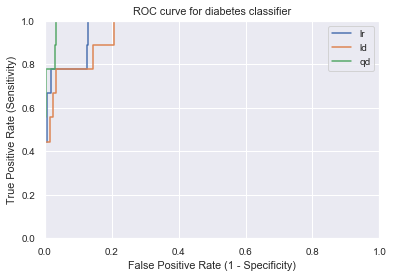

In [22]:
X_no_Limit = X[:, [0,2,3,4,5]]

lr = LogisticRegression()
ld = LinearDiscriminantAnalysis()
qd = QuadraticDiscriminantAnalysis()

classifs = ['lr', 'ld', 'qd']
print("\n------- LR --------")
print(classification_performance(y, lr.fit(X_no_Limit,y).predict(X_no_Limit), lr.predict_proba(X_no_Limit)[:,1]))

print("\n------- LD --------")
print(classification_performance(y, ld.fit(X_no_Limit,y).predict(X_no_Limit), ld.predict_proba(X_no_Limit)[:,1]))

print("\n------- QD --------")
print(classification_performance(y, qd.fit(X_no_Limit,y).predict(X_no_Limit),  qd.predict_proba(X_no_Limit)[:,1]))
plt.legend(classifs);      

In [ ]:
sns.jointplot(x='Income', y='Balance', kind='reg', data=df);

In [ ]:
sns.jointplot(x='Limit', y='Balance', kind='reg', data=df);

In [ ]:
sns.jointplot(x='Rating', y='Balance', kind='reg', data=df);

In [ ]:
sns.jointplot(x='Cards', y='Balance', kind='reg', data=df);

In [ ]:
sns.jointplot(x='Age', y='Balance', kind='reg', data=df);

In [ ]:
sns.jointplot(x='Education', y='Balance', kind='reg', data=df);

In [24]:
# This function find outliers with IQR. I ran it and no outliers came out

def find_outliers(df):
    from pandas.api.types import is_numeric_dtype
    # removing outliers
    column_is_numeric = [is_numeric_dtype(df[i])  for i in df.columns]
    IQR = np.array((df.iloc[:,column_is_numeric].quantile(0.75) - df.iloc[:,column_is_numeric].quantile(0.25)) * 1.5)
    IQR_range = pd.DataFrame()
    IQR_range['low'] = df.iloc[:,column_is_numeric].quantile(0.25) - IQR
    IQR_range['high'] = df.iloc[:,column_is_numeric].quantile(0.75) + IQR

    preserved_rows = np.ones(df.shape[0],dtype = bool)
    for i in IQR_range.index:
        preserved_rows = ((df[i]<=IQR_range.loc[i, 'high']) & preserved_rows)
        preserved_rows = ((df[i]>=IQR_range.loc[i, 'low']) & preserved_rows)

    df_no_outlier = df[preserved_rows]
    nb_outliers = preserved_rows.count() - sum(preserved_rows)    
    if df[preserved_rows == False].shape[0] <= 0:
            print("The data has %d outlier%s" % (nb_outliers , plurialize(nb_outliers)))

find_outliers(df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']])  


In [25]:
# The point of a cross-validation is to find out how well a model works, 
# not to find something “optimal” while doing the evaluations. 
# I use the metric 'Recall' to measure how often is the prediction correct :
# (because the data is unbalanced - almost all False)
# We observe below that qd does a bad job at classifying Balance > 1500 on unseen data
# LD performs best

scoring = 'recall' 

lr = LogisticRegression()
ld = LinearDiscriminantAnalysis()
qd = QuadraticDiscriminantAnalysis()

cv_means = []
for n_splits in range(3,15):
    cv_means.append(cross_val_score(lr, X = X, y = y, scoring = scoring, cv = StratifiedKFold(n_splits= n_splits),\
                    n_jobs=-1).mean())
print("lr mean", scoring, " = ", np.array(cv_means).mean())    

cv_means = []
for n_splits in range(3,15):
    cv_means.append(cross_val_score(ld, X = X, y = y, scoring = scoring, cv = StratifiedKFold(n_splits= n_splits),\
                    n_jobs=-1).mean())
print("ld mean", scoring, " = ", np.array(cv_means).mean())  

cv_means = []
for n_splits in range(3,15):
    cv_means.append(cross_val_score(qd, X = X, y = y, scoring = scoring, cv = StratifiedKFold(n_splits= n_splits),\
                    n_jobs=-1).mean())
print("qd  mean", scoring, " = ", np.array(cv_means).mean())  

lr mean recall  =  0.20414596977096977
ld mean recall  =  0.4383845321345321
qd  mean recall  =  0.0


In [26]:
# I do the same thing here, but without the feature Limit, and we see that recall improved in LD and QD. 
# Removing Limit pays off.

scoring = 'recall' 
lr = LogisticRegression()
ld = LinearDiscriminantAnalysis()
qd = QuadraticDiscriminantAnalysis()

X_temp = X
X = X_no_Limit

cv_means = []
for n_splits in range(3,15):
    cv_means.append(cross_val_score(lr, X = X, y = y, scoring = scoring, cv = StratifiedKFold(n_splits= n_splits),\
                    n_jobs=-1).mean())
print("lr mean", scoring, " = ", np.array(cv_means).mean())    

cv_means = []
for n_splits in range(3,15):
    cv_means.append(cross_val_score(ld, X = X, y = y, scoring = scoring, cv = StratifiedKFold(n_splits= n_splits),\
                    n_jobs=-1).mean())
print("ld mean", scoring, " = ", np.array(cv_means).mean())  

cv_means = []
for n_splits in range(3,15):
    cv_means.append(cross_val_score(qd, X = X, y = y, scoring = scoring, cv = StratifiedKFold(n_splits= n_splits),\
                    n_jobs=-1).mean())
print("qd  mean", scoring, " = ", np.array(cv_means).mean())  

lr mean recall  =  0.20414596977096977
ld mean recall  =  0.44433691308691303
qd  mean recall  =  0.044475431975431974


In [27]:
# Playing a little bit with a special case of leave-p-out cross-validation with p = 1
# This time I use residual sum of square as a performance indicator. 
# This exercise shows the importance of using multiple indicators. LD has the largest rss

from sklearn.model_selection import LeaveOneOut

lr = LogisticRegression()
ld = LinearDiscriminantAnalysis()
qd = QuadraticDiscriminantAnalysis()

loo = LeaveOneOut()
loo.get_n_splits(df)

algos = [lr, ld, qd]
classifs = ['lr', 'ld', 'qd']

for j in range(0,len(algos)) :
    rss = np.zeros(df.shape[0])
    i = 0
    print("\n------- {} --------".format(classifs[j]))
    for train_i, test_i in loo.split(df):  
        algos[j].fit(X[train_i], y[train_i])
        err = (algos[j].predict(X[test_i]) - y[test_i])**2
        if err != 0 : 
            print(err)
        rss[i] = err
        i += 1
    print('lr rss = ', np.sum(rss))  


------- lr --------
[1]
[1]
[1]
[1]
[1]
[1]
[1]
lr rss =  7.0

------- ld --------
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
lr rss =  13.0

------- qd --------
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
lr rss =  10.0
